## Observations and Insights 

Three observations from this data:
1. The line plot "Tumor Volume Over Time" shows that as time goes on (timepoint increases), the the tumor volume decreases under the Capomulin drug regimen. This means that Capomulin is working!
2. The bar plot "Timepoints for Mice Tested by Drug Regimen" indicates that not all the drugs were tested the same amount of times. The drug Capomulin, for example, was tested more times than the drug Propriva.
3. The scatter plot shows a positive correlation between average mouse weight (g) and tumor volume (mm3). 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()


# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
combined_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
rows = combined_results['Mouse ID'].count()
rows

mice = combined_results['Mouse ID'].nunique()
mice

display(rows)
display(mice)

1893

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = combined_results.duplicated(subset=['Mouse ID','Timepoint'], keep = 'first')
n_dups = (~combined_results.duplicated(subset=['Timepoint','Timepoint'])).sum()
n_not_dups = (combined_results.duplicated(subset=['Timepoint','Timepoint'])).sum()

display(dups)
#dups.tail()
display(n_dups)
display(n_not_dups)


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

10

1883

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = combined_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
display(clean_results)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice in the clean DataFrame.
rows = clean_results['Mouse ID'].count()
display(rows)
mice = clean_results['Mouse ID'].nunique()
display(mice)

1888

249

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

sum_stats = clean_results.groupby('Drug Regimen').agg(Mean = ('Tumor Volume (mm3)', 'mean'),
                                                      Median = ('Tumor Volume (mm3)', 'median'),
                                                      Variance = ('Tumor Volume (mm3)', 'var'),
                                                      Standard_Deviation = ('Tumor Volume (mm3)', 'std'),
                                                      SEM = ('Tumor Volume (mm3)', 'sem'))
display(sum_stats)




,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

sum_stats = clean_results.groupby('Drug Regimen').agg(Mean = ('Tumor Volume (mm3)', 'mean'),
                                                      Median = ('Tumor Volume (mm3)', 'median'),
                                                      Variance = ('Tumor Volume (mm3)', 'var'),
                                                      Standard_Deviation = ('Tumor Volume (mm3)', 'std'),
                                                      SEM = ('Tumor Volume (mm3)', 'sem'))
display(sum_stats)

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

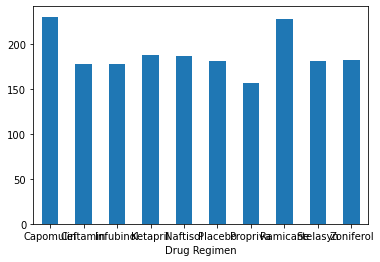

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

times_pandas = clean_results.groupby('Drug Regimen')['Timepoint'].count()
TP_pandas_chart = times_pandas.plot.bar(x='Drug Regimen', y='Timepoint', rot=0)
TP_pandas_chart





Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

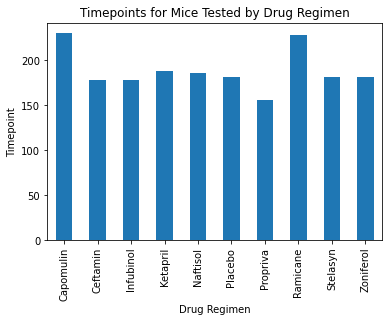

<Figure size 432x288 with 0 Axes>

In [78]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

times = clean_results.groupby('Drug Regimen')['Timepoint'].count()
# reset_index() changes row names to index number
display(times)

TP_chart = times.plot(kind="bar", title="Timepoints for Mice Tested by Drug Regimen")
TP_chart.set_xlabel("Drug Regimen")
TP_chart.set_ylabel("Timepoint")

plt.show()
plt.tight_layout()

#drugs = times['Drug Regimen']
#drugs.reset_index(drop=True, inplace=True)
#print(drugs)


In [45]:
gender_dist = clean_results.groupby('Sex').nunique()
gender_dist

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,124,10,24,14,10,807,5
Male,125,10,24,14,10,834,5


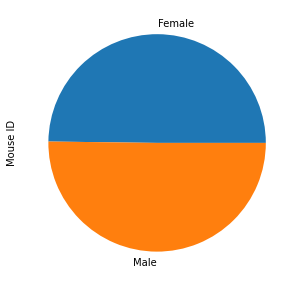

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_dist = clean_results.groupby('Sex')['Mouse ID'].nunique()
gender_dist

# --- dataset 1: just 4 values for 4 groups:
#gen_legend = pd.DataFrame([124,125], index=['Female','Male'], columns=['x'])
#df = pd.DataFrame([8,8,1,2], index=['a', 'b', 'c', 'd'], columns=['x'])
 
# make the plot
gender_dist.plot(kind='pie', subplots=True, figsize=(5, 5))
# make the plot
#df.plot(kind='pie', subplots=True, figsize=(8, 8))
        
# show the plot
plt.show()

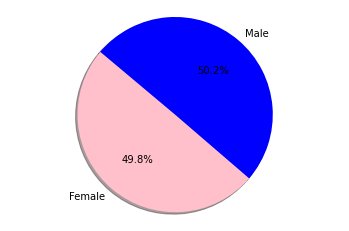

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [124,125]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
# explode = (0.1, 0, 0, .3,0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
display(clean_results)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

clean_results_sub = clean_results[clean_results["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#display(clean_results_sub)

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_results_sub.groupby('Mouse ID')['Timepoint'].max()
display(last_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_last_tp = pd.merge(last_time, clean_results, on = 'Mouse ID')
display(mouse_last_tp)

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
809,z581,45,Infubinol,Female,24,25,25,54.316407,2
810,z581,45,Infubinol,Female,24,25,30,56.286750,2
811,z581,45,Infubinol,Female,24,25,35,58.628399,3
812,z581,45,Infubinol,Female,24,25,40,60.053740,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

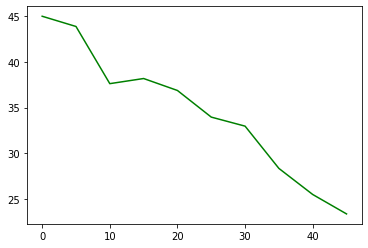

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mice = clean_results[clean_results["Drug Regimen"].isin(["Capomulin"])]
#display(capomulin_mice)

capomulin_mouse = clean_results[clean_results["Mouse ID"].isin(["s185"])]
#display(capomulin_mouse)

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], color="green", label="Tumor Growth Over Time")
 

#clean_results_sub = clean_results[clean_results["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#display(clean_results_sub)

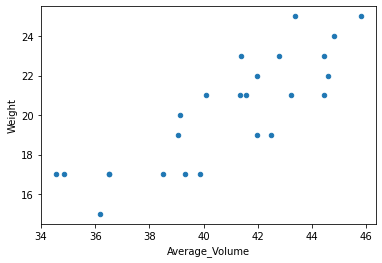

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_treatment = clean_results[clean_results['Drug Regimen']=='Capomulin']
#display(capomulin_treatment)

mouse_record = capomulin_treatment.groupby(['Mouse ID']).agg(Average_Volume=('Tumor Volume (mm3)','mean'),
                                                            Weight=('Weight (g)','mean'))
mouse_record

#DataFrame.plot.scatter(x, y, s=None, c=None, **kwargs)
#                  columns=['length', 'width', 'species'])
ax1 = mouse_record.plot.scatter(x='Average_Volume',
                      y='Weight')
    

## Correlation and Regression

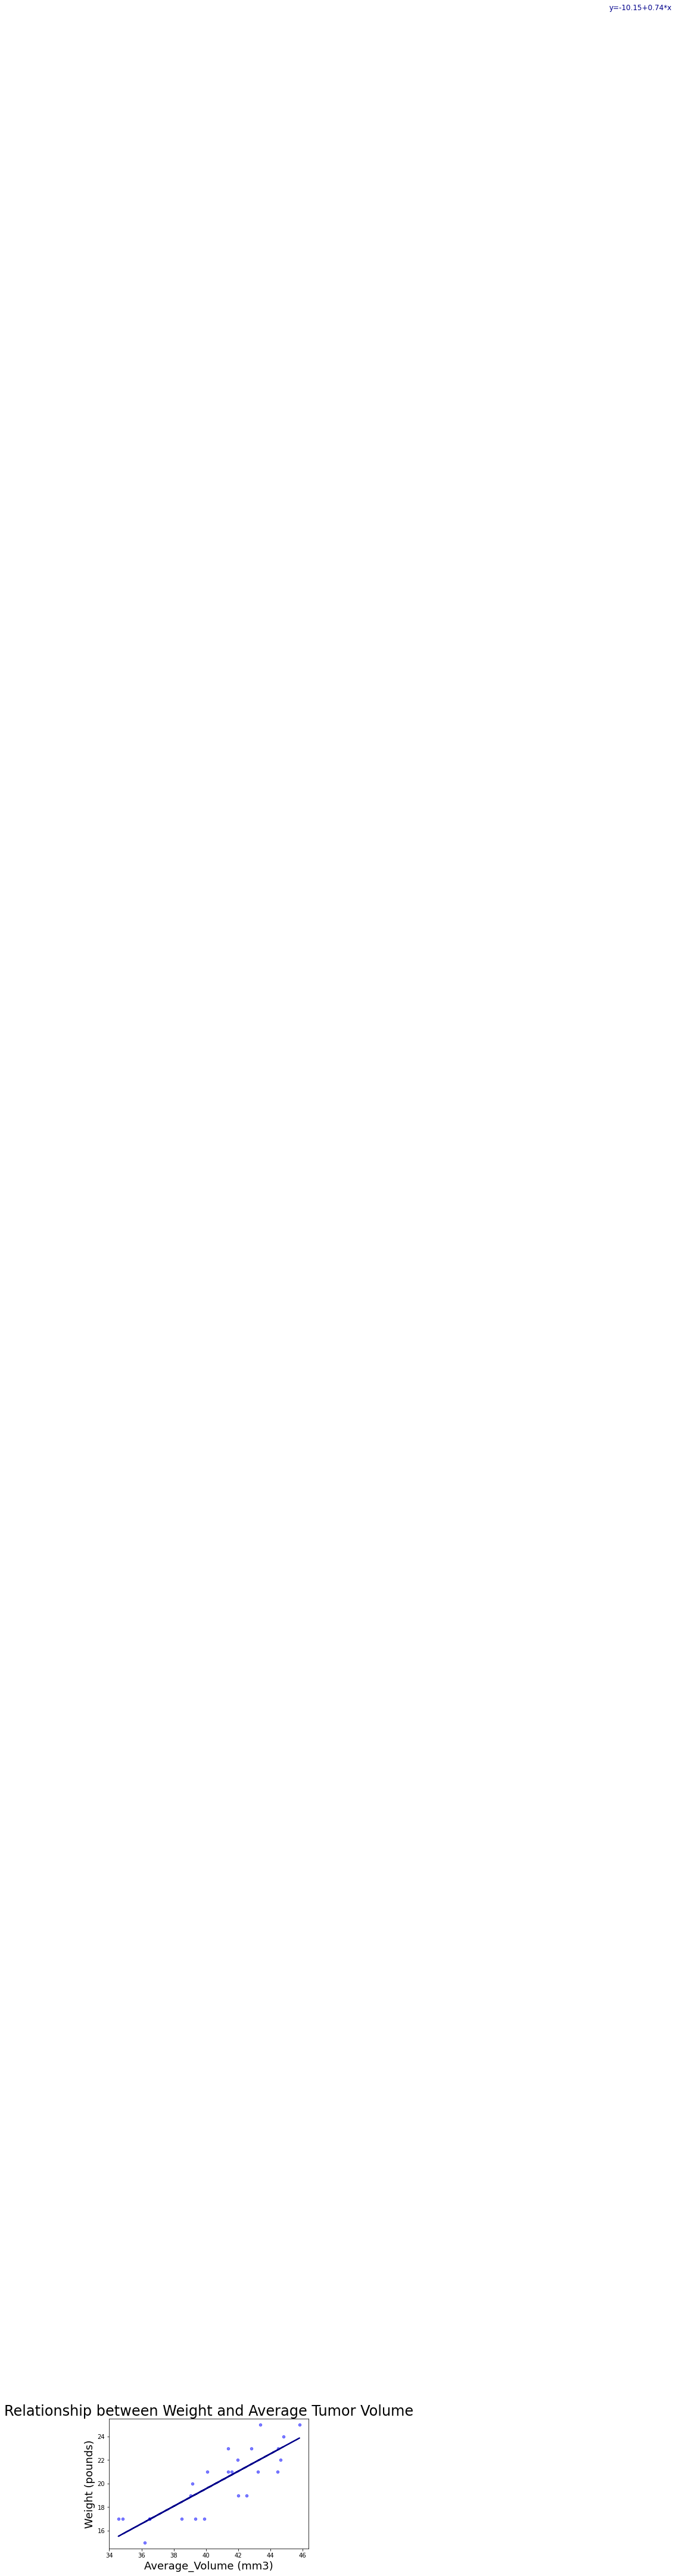

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#import numpy as np
mouse_record.corr(method='pearson', min_periods=1)
#display(mouse_record)
mouse_fit = np.polyfit(mouse_record.Average_Volume, mouse_record.Weight, 1)

ax1 = mouse_record.plot.scatter(x='Average_Volume', y='Weight', color='blue', alpha=0.5)

plt.plot(mouse_record.Average_Volume, mouse_fit[0] * mouse_record.Average_Volume + mouse_fit[1], color='darkblue', linewidth=2)
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(mouse_fit[1], mouse_fit[0]), color='darkblue', size=12)

# legend, title and labels.
#plt.legend(labels=['Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Weight and Average Tumor Volume', size=24)
plt.xlabel('Average_Volume (mm3)', size=18)
plt.ylabel('Weight (pounds)', size=18);